In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import convolve2d

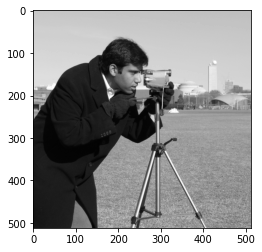

In [2]:
img = imageio.imread('imageio:camera.png')/255
plt.imshow(img, 'gray')

In [3]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

In [4]:
from matplotlib import cm

def plot_kernel(data, ax=None):
    rows, cols = data.shape
    y, x = np.meshgrid(np.arange(rows),np.arange(cols),indexing='ij')
    if ax == None:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    _min, _max = (np.min(data), np.max(data))
    ax.plot_surface(x, y, data.T, cmap=cm.jet, vmin=_min, vmax=_max)

def plot_images_and_kernel(img, img_filt, kernel):
    fig = plt.figure(figsize=(17,5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, 'gray')
    ax1.title.set_text('Input image')
    ax2 = fig.add_subplot(132)
    ax2.imshow(img_filt, 'gray')
    ax2.title.set_text('Filtered image')
    ax3 = fig.add_subplot(133, projection='3d')
    plot_kernel(kernel, ax=ax3)
    ax3.title.set_text('Kernel')
    plt.show()

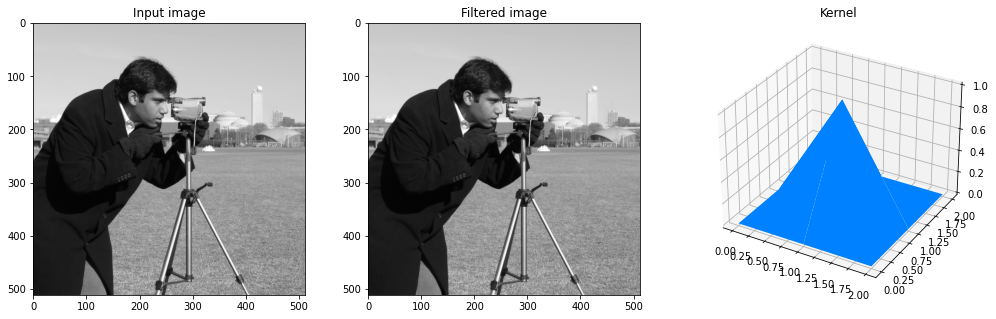

In [5]:
# Ejemplo del kernel identidad
kernel = np.zeros((3,3))
kernel[1,1] = 1
kernel /= kernel.sum()

img_filt = convolve2d(img, kernel, 'same')

plot_images_and_kernel(img, img_filt, kernel)

In [6]:
# Box (pasabajos)

def Box(n=1):
    
    int(n)
    if (n % 2 != 0):
        kernel = np.ones((n,n)) # box cuadrado de unos
        kernel /= kernel.sum()  # se normaliza
        return kernel
    else:
        return print("Ingrese un tamaño de kernel impar")


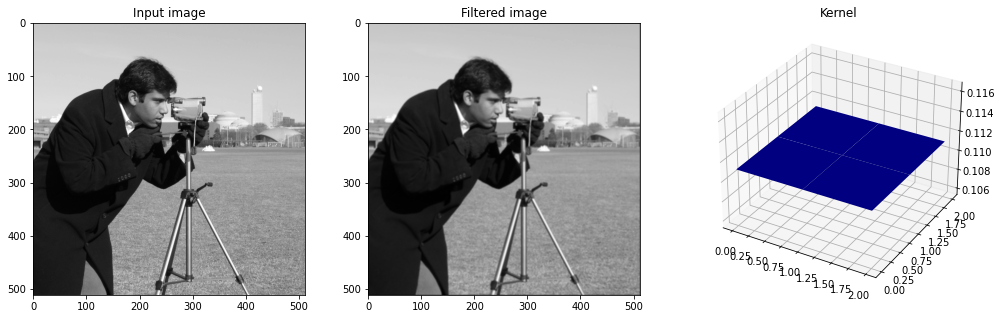

In [7]:
# prueba BOX pasabajos

kernel = Box(3)
img_filt = convolve2d(img, kernel, 'same')

plot_images_and_kernel(img, img_filt, kernel)

In [8]:
# Bartlett (pasabajos)

def Bartlett(n=1):
    
    int(n)
    if (n % 2 != 0):

        # se construye el vector de secuencia creciente hasta el valor n/2 (truncado) y luego decreciente hasta el final.
       
        vector = np.ones(n)
        for i in range(0,n):
            if (i<=np.trunc(n/2)):
                if (i==0):
                    vector[i] = 1
                else:
                    vector[i] = vector[i-1] + 1
            else:
                vector[i] = vector[i-1] - 1
      
        # luego, se construye el vector horizontal (row) y vertical (col) 

        vector_row = vector
        vector_col = np.transpose(vector)

        # a continuación, el kernel se construye multiplicando cada vector de la forma: k(i,j) = v_row (i) * v_row(j) de manera tal de obtener el kernel

        kernel = np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                kernel[i,j] = vector_row[i]*vector_col[j]

        print(kernel)
        kernel /= kernel.sum() 
        return kernel
    else:
        return print("Ingrese un tamaño de kernel impar")

[[1. 2. 3. 2. 1.]
 [2. 4. 6. 4. 2.]
 [3. 6. 9. 6. 3.]
 [2. 4. 6. 4. 2.]
 [1. 2. 3. 2. 1.]]


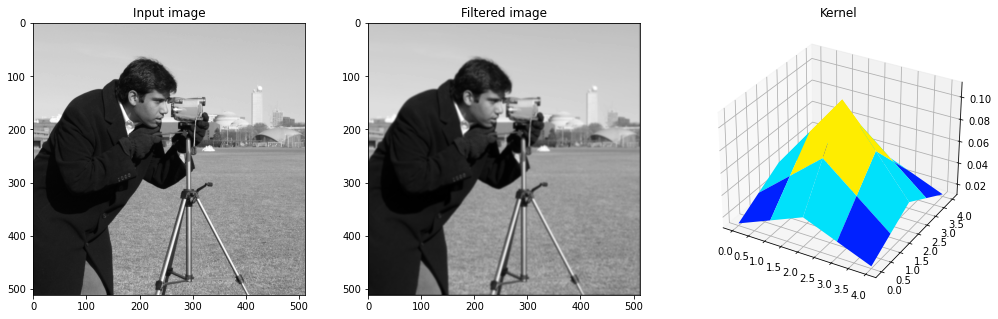

In [9]:
# prueba Barlett pasabajos

kernel = Bartlett(5)
img_filt = convolve2d(img, kernel, 'same')

plot_images_and_kernel(img, img_filt, kernel)

In [10]:
# Gaussiano

def Gaussiano(n):

    from math import factorial
    int(n)
    if (n % 2 != 0):

        vector = np.ones(n)

        # se creea el vector que existe en el triangulo de pascal a partir de la ecuación de un nivel del triangulo

        for i in range(0,n):
            vector[i] = factorial(n-1)/(factorial(i)*factorial(n-1-i))
        
        # luego, se construye el vector horizontal (row) y vertical (col) 

        vector_row = vector
        print(vector)
        vector_col = np.transpose(vector)

        # a continuación, el kernel se construye multiplicando cada vector de la forma: k(i,j) = v_row (i) * v_row(j) de manera tal de obtener el kernel

        kernel = np.zeros((n,n))
        for i in range(n):
             for j in range(n):
                kernel[i,j] = vector_row[i]*vector_col[j]

        kernel /= kernel.sum() 
        return kernel
    else:
        return print("Ingrese un tamaño de kernel impar")



#print(Gaussiano(5))

[1.000000e+00 2.400000e+01 2.760000e+02 2.024000e+03 1.062600e+04
 4.250400e+04 1.345960e+05 3.461040e+05 7.354710e+05 1.307504e+06
 1.961256e+06 2.496144e+06 2.704156e+06 2.496144e+06 1.961256e+06
 1.307504e+06 7.354710e+05 3.461040e+05 1.345960e+05 4.250400e+04
 1.062600e+04 2.024000e+03 2.760000e+02 2.400000e+01 1.000000e+00]


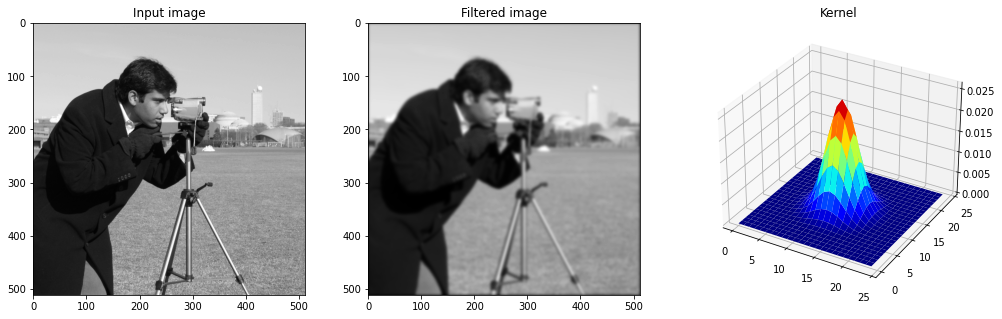

In [11]:
# prueba Gaussiano pasabajos

kernel = Gaussiano(25)
img_filt = convolve2d(img, kernel, 'same')

plot_images_and_kernel(img, img_filt, kernel)

In [12]:
# Laplace (pasaaltos)

def Laplace(n):
    int(n)
    if (n==4):
        kernel = [[0, -1, 0],[-1, 4, -1],[0, -1, 0]] # se arman los kernel fijos
        print(kernel)
        return np.asmatrix(kernel)                   # se dimensiona a numpy
    elif (n==8):
         kernel = [[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]
         return np.asmatrix(kernel) 
    else:
        return print("ingrese el número de vecinos: n=4 o n=8")

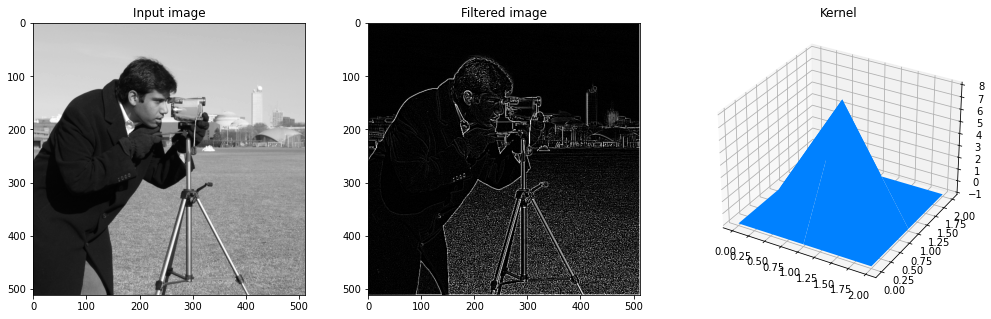

In [13]:
# prueba Laplaciano pasaaltos

kernel = Laplace(8)
img_filt = convolve2d(img, kernel, 'same')
img_filt = np.clip(img_filt,0,1)
plot_images_and_kernel(img, img_filt, kernel)

In [14]:
# Pasaaltos a partir de pasabajos

def Pasaaltos(n):
    Kernel_id = np.zeros((n,n)) 
    Kernel_id[round((n-1)/2),round((n-1)/2)]=1  # se arma el kernel identidad poniendo un 1 en el centro y cero en los demas valores.
    Kernel = Kernel_id - Gaussiano(n)           # se restan el kernel identidad y el gaussiano en n
    return Kernel




[ 1.  6. 15. 20. 15.  6.  1.]


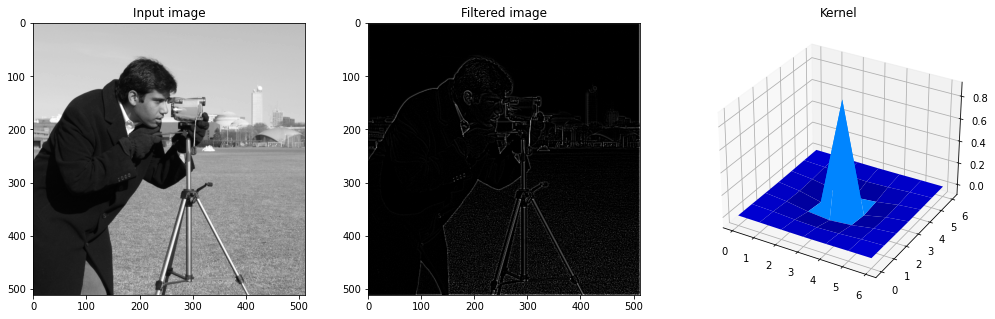

In [15]:
# prueba Pasaaltos 

kernel = Pasaaltos(7)
img_filt = convolve2d(img, kernel, 'same')
img_filt = np.clip(img_filt,0,1)
plot_images_and_kernel(img, img_filt, kernel)

In [16]:
# DOG

def DOG(n1,n2):

    # se elaboran ambos kernel gaussianos

    kernel1 = Gaussiano(n1)
    kernel2 = Gaussiano(n2)

    # se hace el padding necesario si n1>n2

    if (len(kernel1)>len(kernel2)):
        kernel2 = np.pad(kernel2,pad_width=int((n1-n2)/2))
        print(kernel2)
        return ((2**(n1-n2)*kernel2)-kernel1) # se corrige la norma de la matriz con padding
    
    # se hace el padding necesario si n2>n1

    elif ((len(kernel1))<len(kernel2)):
        kernel1 = np.pad(kernel1,pad_width=int((n2-n1)/2))
        print(kernel1)
        
        return (((2**(n2-n1))*kernel1)-kernel2) # se corrige la nroma de la matriz con padding

    else:
        return(kernel1-kernel2)


[1. 4. 6. 4. 1.]
[1. 2. 1.]
[[0.     0.     0.     0.     0.    ]
 [0.     0.0625 0.125  0.0625 0.    ]
 [0.     0.125  0.25   0.125  0.    ]
 [0.     0.0625 0.125  0.0625 0.    ]
 [0.     0.     0.     0.     0.    ]]


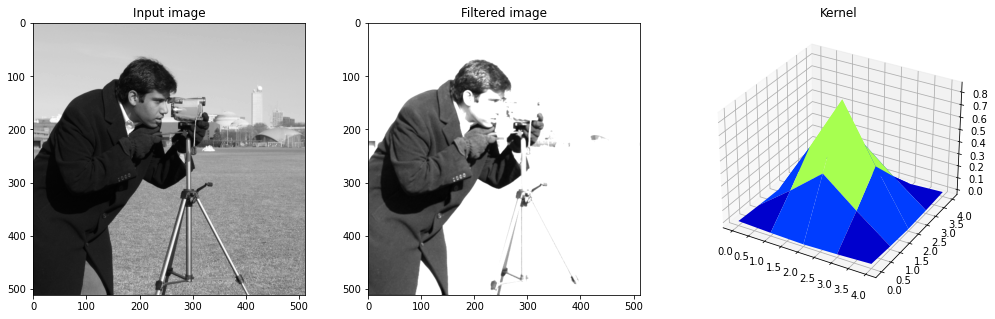

In [17]:
# prueba DOG 

kernel = DOG(5,3)
img_filt = convolve2d(img, kernel, 'same')
img_filt = np.clip(img_filt,0,1)
plot_images_and_kernel(img, img_filt, kernel)

In [18]:
# Contraste

def Contraste(n,k):
    Kernel_id = np.zeros((n,n)) 
    Kernel_id[round((n-1)/2),round((n-1)/2)]=1
    Kernel = Kernel_id + Pasaaltos(n)
    return Kernel

[ 1.  6. 15. 20. 15.  6.  1.]


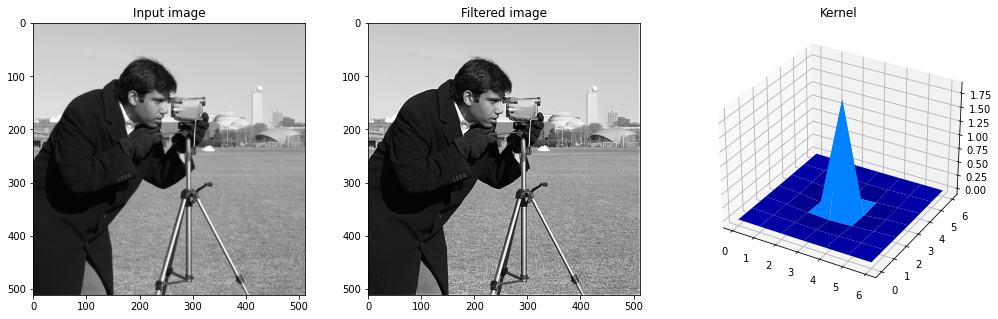

In [19]:
# prueba Contraste 

kernel = Contraste(7,0.2)
img_filt = convolve2d(img, kernel, 'same')
img_filt = np.clip(img_filt,0,1)
plot_images_and_kernel(img, img_filt, kernel)

In [21]:
def Sobel(img):

    Kx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    Ky = [[1, 2, 1], [0, 0, 0,], [-1,-2,-1]]
    Kx = np.asmatrix(Kx)
    Ky = np.asmatrix(Ky)

    Gx = convolve2d(img, Kx, 'same')
    Gy = convolve2d(img, Ky, 'same')


    rows = Gx.shape[0]
    cols = Gx.shape[1]
    Module = np.zeros((rows,cols))
    Phase = np.zeros((rows,cols))
    for i in range(0,rows):
        for j in range(0,cols):
            Module[i,j] = np.sqrt(Gx[i,j]**2+Gy[i,j]**2)
            Phase[i,j] = np.arctan(Gy[i,j]/Gx[i,j])

    
    return Module,Phase,Kx,Ky,Gx,Gy

C:\Users\franc\AppData\Local\Temp\ipykernel_2092\1362945567.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  Phase[i,j] = np.arctan(Gy[i,j]/Gx[i,j])
C:\Users\franc\AppData\Local\Temp\ipykernel_2092\1362945567.py:19: RuntimeWarning: invalid value encountered in double_scalars
  Phase[i,j] = np.arctan(Gy[i,j]/Gx[i,j])


3.3725490196078427
-3.7176470588235295


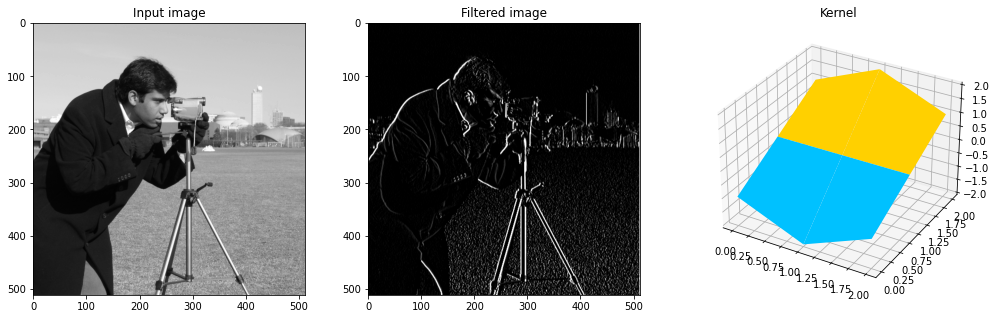

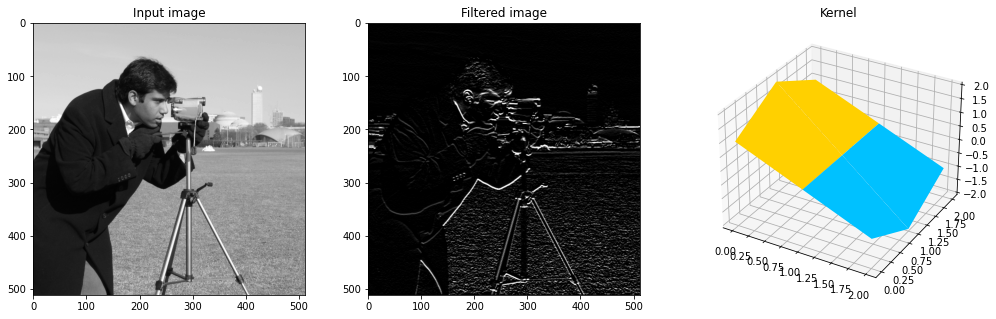

3.9371181915176536
0.0


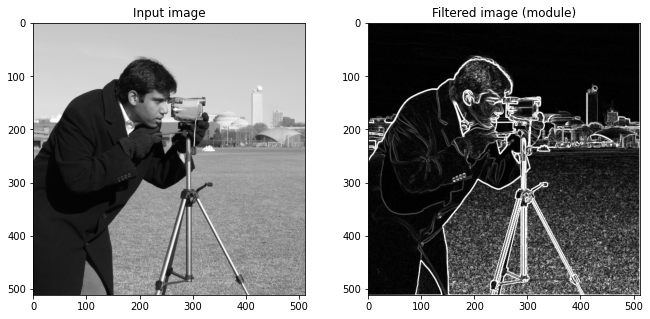

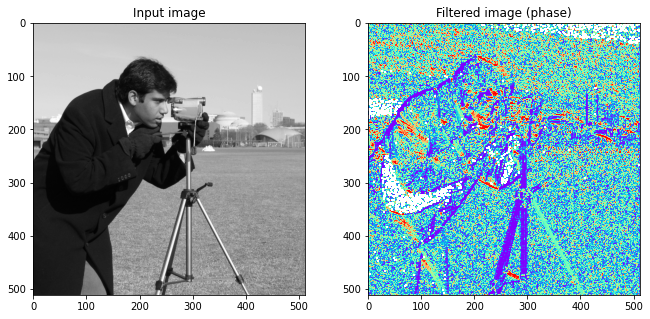

In [22]:
Module, Phase,Kx,Ky,Gx,Gy = Sobel(img)

# ploteo gradientes 

plot_images_and_kernel(img, np.clip(Gx,0,1), Kx)
plot_images_and_kernel(img,np.clip(Gy,0,1),Ky)

# ploteo imagen y modulo

fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img, 'gray')
ax1.title.set_text('Input image')
ax2 = fig.add_subplot(132)
ax2.imshow(np.clip(Module,0,1), 'gray')
ax2.title.set_text('Filtered image (module)')

print(np.amax(Module))
print(np.amin(Module))

# ploteo imagen y fase

fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img, 'gray')
ax1.title.set_text('Input image')
ax2 = fig.add_subplot(132)
ax2.imshow(np.clip(Phase,0,1), 'rainbow')
ax2.title.set_text('Filtered image (phase)')


plt.show()



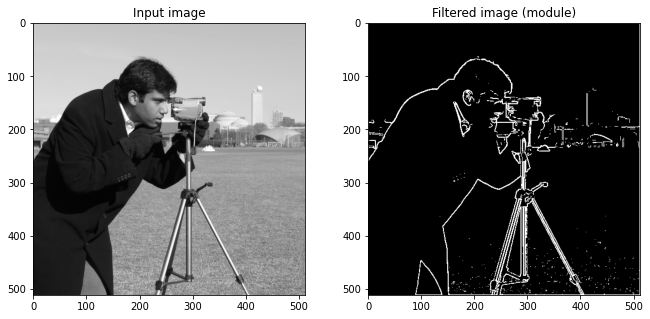

In [23]:

rows = Module.shape[0]
cols = Module.shape[1]

Module_umbral = np.zeros((rows,cols))
for i in range(rows):
    for j in range(cols):
        if Module[i,j]<0.85: 
            Module_umbral[i,j]=0 
        else:
            Module_umbral[i,j]=1


# ploteo imagen y modulo

fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img, 'gray')
ax1.title.set_text('Input image')
ax2 = fig.add_subplot(132)
ax2.imshow(np.clip(Module_umbral,0,1), 'gray')
ax2.title.set_text('Filtered image (module)')

In [ ]:
# Explicación detector de bordes de Canny

"""

El detector de bordes de Canny se compone de varias etapas hasta llegar al demarcado de bordes:

En primer lugar, es necesario eliminar (o al menos reducir) el ruido de la imagen de entrada. Para ello se utiliza un filtro Gaussiano 
con un kernel de tamaño a elección. En este punto, se cuenta con una imagen "suavizada" o "borrosa" sin ruido. A continuación, se calculan 
los gradientes Gx y Gy mediante Sobel. Junto a esto, se aplica también módulo y fase.

Una vez que se cuenta con todos los componentes nombrados anteriormente, se procede a eliminar el "grosor" de los bordes. Es decir, se 
desea un borde angosto con la menor cantidad de pixeles posibles. Para esto, se recorre toda la imagen (a la que ya se le ha analizado 
y detectado ciertos bordes), analizando en cada punto si el pixel en cuestión es el de mayor intensidad (es decir, se observa si cada 
pixel es mayor que sus vecinos). Dicho análisis se lleva a cabo observando los gradientes Gx y Gy sobre los bordes encontrados previamente.
El resultado de esto es la misma imagen pero con sus bordes mas angostos.

El próximo paso consiste en un análisis de doble umbral. Esto se utiliza para plantear 3 tipos de pixeles. Primero se aplica un umbral alto,
con lo que se hace una primera separación (pixeles de valor alto o fuertes). Luego, se aplica un umbral bajo, con lo que se distingue entre los pixeles
de valor bajo (aquellos que superan este umbral bajo pero NO superan el umbral alto), y los pixeles no relevantes (aquellos que no superan ninguno
de los dos umbrales.)

En siguiente lugar, se lleva a cabo el proceso de histéresis. Este proceso analiza los pixeles débiles, y según si alguno de sus vecinos es catalogado
como fuerte, entonces él mismo se clasifica como fuerte.

Finalmente, una vez aplicados todos estos pasos se tiene la imagen con los bordes mejor definidos que con el método de Sobel. 

"""
